In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [164]:
data =pd.read_csv('train.csv')
data.head()

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.30,0,0,3,2632.9920,1
1,990,26,0,19.80,1,0,3,3378.9100,0
2,123,44,1,31.35,1,1,0,39556.4945,1
3,184,44,1,30.69,2,0,2,7731.4271,0
4,1167,29,0,24.60,2,0,3,4529.4770,0


In [178]:
test1 = pd.read_csv('test.csv')
test.head()
# test.drop('Id',axis=1,inplace=True)
test1

,Id,age,sex,bmi,children,smoker,region,charges
0,811,33,0,42.940,3,0,1,6360.99360
1,973,19,0,40.500,0,0,3,1759.33800
2,308,58,1,34.865,0,0,0,11944.59435
3,845,60,0,32.450,0,1,2,45008.95550
4,1050,44,0,36.955,1,0,1,8023.13545
...,...,...,...,...,...,...,...,...
263,461,42,1,30.000,0,1,3,22144.03200
264,626,36,1,28.880,3,0,0,6748.59120
265,614,20,0,33.000,0,0,2,1880.07000
266,636,19,0,24.510,1,0,1,2709.11190


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [166]:

X = data.iloc[:,:-1]
X
y = data['insuranceclaim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28,random_state=100)

In [167]:
# X_train.shape
# X_test.shape
# y_train.head()
# y_test.head()

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

q_value:  40.87049999999999
1    428
0    342
Name: insuranceclaim, dtype: int64


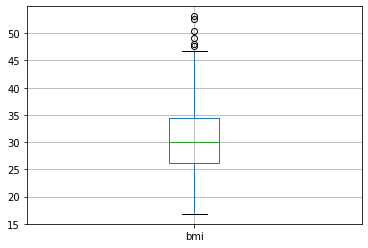

In [168]:
X_train.boxplot(column=['bmi'])

q_value = X_train['bmi'].quantile(0.95)
print("q_value: ", q_value)

print(y_train.value_counts(normalize=False))

In [169]:
relation = X_train.corr()
print("relation: \n", relation)

# sns.pairplot(X_train)

relation: 
                 Id       age       sex       bmi  children    smoker  \
Id        1.000000 -0.053864  0.021105 -0.029367  0.040895 -0.002216   
age      -0.053864  1.000000 -0.029967  0.093549  0.108584 -0.027842   
sex       0.021105 -0.029967  1.000000  0.059973  0.008854  0.081520   
bmi      -0.029367  0.093549  0.059973  1.000000  0.025485 -0.020383   
children  0.040895  0.108584  0.008854  0.025485  1.000000  0.004568   
smoker   -0.002216 -0.027842  0.081520 -0.020383  0.004568  1.000000   
region   -0.012890 -0.025832  0.030225  0.158222  0.047344 -0.022029   
charges  -0.026994  0.324113  0.059763  0.183361  0.096387  0.756451   

            region   charges  
Id       -0.012890 -0.026994  
age      -0.025832  0.324113  
sex       0.030225  0.059763  
bmi       0.158222  0.183361  
children  0.047344  0.096387  
smoker   -0.022029  0.756451  
region    1.000000 -0.039719  
charges  -0.039719  1.000000  


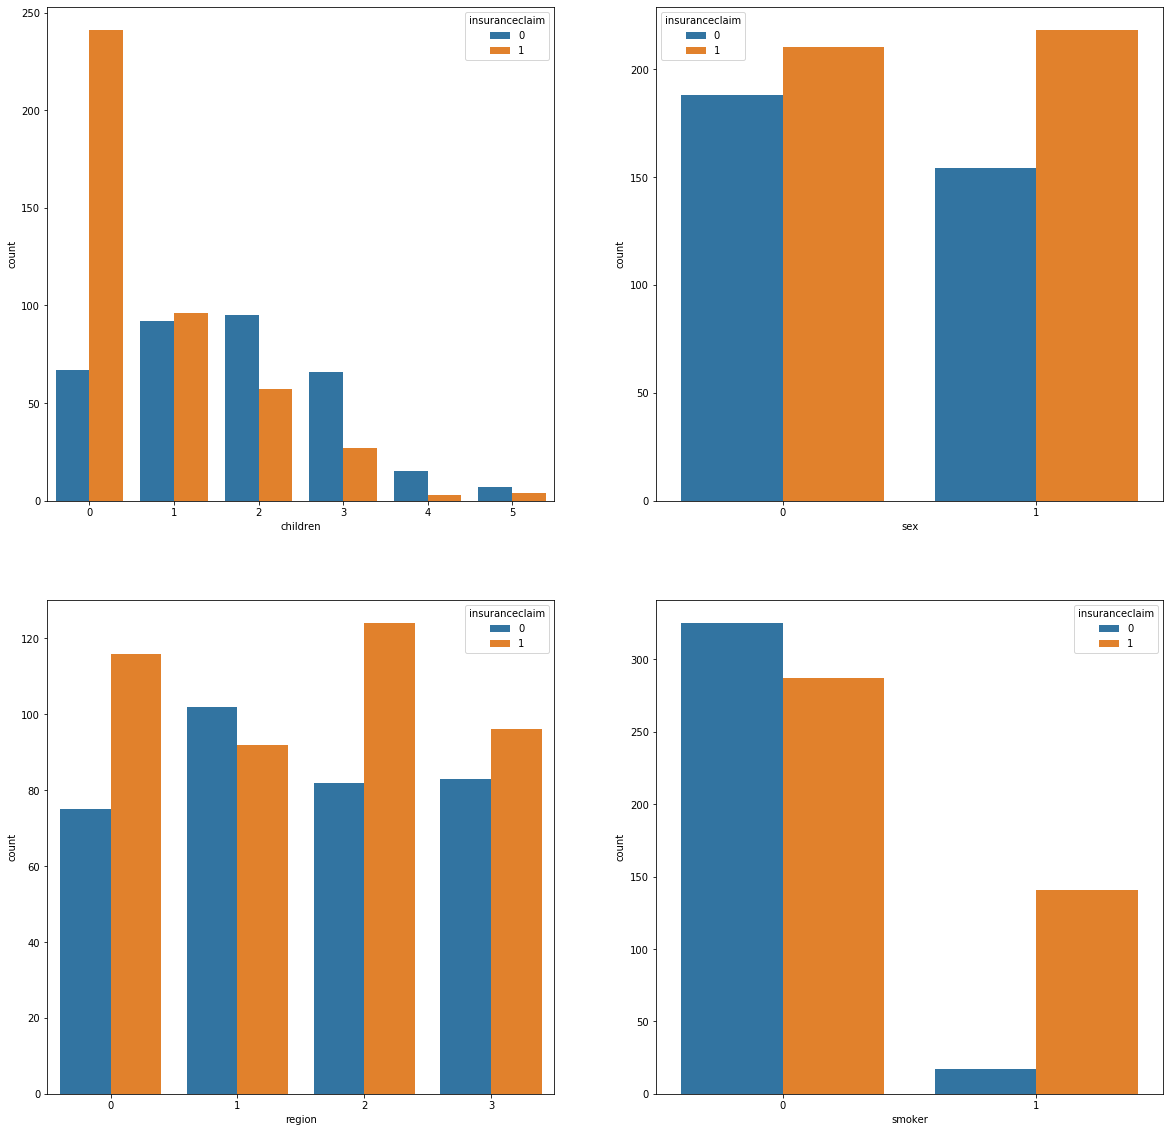

In [170]:
cols = ['children','sex','region','smoker']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20,20))
for i in range(2):
    for j in range(2):
        col = cols[ i * 2 + j]
        sns.countplot(x = X_train[col], hue = y_train, ax = axes[i,j])

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [171]:
# parameters for grid search
# parameters = {'C':[0.1,0.5,1,5]}
parameters = {'C':[.2,.4,.6,.8,2,6,8]}


lr = LogisticRegression()
grid = GridSearchCV(estimator = lr, param_grid = parameters)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8233333333333334

roc_auc:  0.9196759259259258


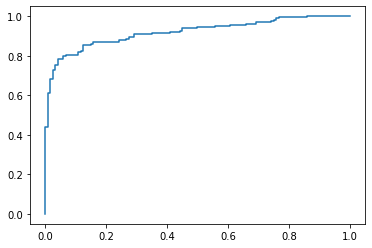

In [172]:

score = roc_auc_score(y_pred, y_test)
y_pred_proba = grid.predict_proba(X_test)[:,1]

fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc: ",roc_auc)

plt.plot(fpr, tpr, label="Logistic model, auc= "+str(roc_auc))
plt.show()

# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [179]:
test = pd.read_csv('test.csv')
test.head()
id_ = test['Id']


In [180]:
test =test[['Id','age','sex','bmi','children','smoker','region','charges']]

In [181]:
# Code starts here

# Predict on the test data
y_pred_test4 = grid.predict(test)

print(y_pred_test4)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'insuranceclaim':y_pred_test4})

# Convert the sample submission file into a csv file
sample_submission.to_csv('submission_file2.csv',index=False)

# Code ends here

[0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 0]
